<a href="https://colab.research.google.com/github/veels3122/Machine-Learning_AMAN/blob/main/Regresion%20logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PlayerID  Goals  Assists  MatchesPlayed    Rating
0      3659     27        9             20  8.925168
1      5191     28        0             26  1.326678
2      1789      8        9             20  7.848296
3      5448      2       12             17  8.522834
4      4605     21        7             15  3.805283
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerID       2000 non-null   int64  
 1   Goals          2000 non-null   int64  
 2   Assists        2000 non-null   int64  
 3   MatchesPlayed  2000 non-null   int64  
 4   Rating         2000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 78.2 KB
None
          PlayerID        Goals      Assists  MatchesPlayed       Rating
count  2000.000000  2000.000000  2000.000000    2000.000000  2000.000000
mean   5446.373500    14.854000     6.987500      23.356500     5.

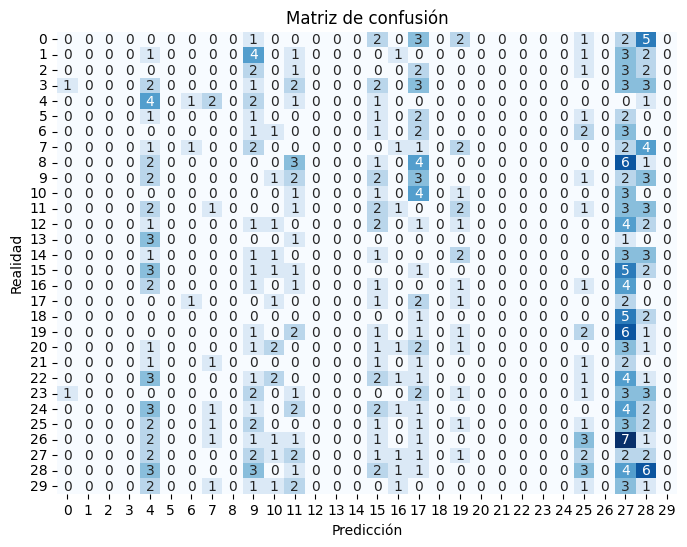

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        17
           4       0.09      0.33      0.14        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        10
          11       0.04      0.06      0.05        16
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        11
          17       0.05    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Importamos librerías necesarias (ignorando advertencias de tipo)
import numpy as np  # Librería para trabajar con arrays multidimensionales
import pandas as pd  # Librería para análisis y manipulación de datos
import matplotlib.pyplot as plt  # Librería para creación de gráficos
import seaborn as sns  # Librería para visualización avanzada de datos
from sklearn.model_selection import train_test_split  # Librería para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Librería para escalar características
from sklearn.linear_model import LogisticRegression  # Librería para el modelo de regresión logística
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Librería para métricas de evaluación

# Carga del conjunto de datos
data = pd.read_csv('/usr/local/lib/football_player_stats.csv')

# Exploración inicial de datos
print(data.head())  # Muestra las primeras filas del conjunto de datos
print(data.info())  # Muestra información sobre los tipos de datos y valores nulos
print(data.describe())  # Muestra estadísticas descriptivas de las variables numéricas

# Preprocesamiento de datos
x = data.drop('Goals', axis=1)  # Se separan las características (sin la columna "Goals")
y = data['Goals']  # Se define la variable objetivo ("Goals")

# División de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#  - x_train: Características para entrenamiento
#  - x_test: Características para prueba
#  - y_train: Variable objetivo para entrenamiento
#  - y_test: Variable objetivo para prueba
#  - test_size: Proporción de datos para prueba (20%)
#  - random_state: Semilla aleatoria para garantizar reproducibilidad

# Estandarización de características
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Se ajusta y transforma el conjunto de entrenamiento
x_test_scaled = scaler.transform(x_test)  # Se transforma el conjunto de prueba usando el mismo escalador

# Entrenamiento del modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)  # Se entrena el modelo con los datos escalados

# Predicción de la variable objetivo
y_pred = logistic_model.predict(x_test_scaled)  # Se predicen los goles usando el modelo entrenado

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)  # Matriz de confusión para ver predicciones correctas e incorrectas

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))  # Se define el tamaño de la figura
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Se crea la matriz de calor
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de confusión')
plt.show()  # Se muestra la matriz de confusión

# Reporte de clasificación con métricas como precisión, recuerdo y F1-score
print(classification_report(y_test, y_pred))

# Cálculo y visualización de la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')